In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 

In [5]:
fo = '/chinook/cruman/Data/Near0Events'
# Get the average number of hours near 0
d_array_case1 = np.zeros((14,12,1015,1359))
d_array_case2 = np.zeros((14,12,1015,1359))
d_array_case3 = np.zeros((14,12,1015,1359))
d_array_case4 = np.zeros((14,12,1015,1359))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_case1_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f"{fo}/t2m_case2_{y}_{m:02d}.p", "rb"))
        aux3 = pickle.load( open(f'{fo}/t2m_case3_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_case4_{y}_{m:02d}.p', 'rb'))
        
        d_array_case1[i,m-1] += aux        
        d_array_case2[i,m-1] += aux2
        d_array_case3[i,m-1] += aux3
        d_array_case4[i,m-1] += aux4
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        



Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [4]:
fo = '/chinook/cruman/Data/Near0Events'
# Get the average number of hours near 0
d_array = np.zeros((14,12,1015,1359))
d_array_pr = np.zeros((14,12,1015,1359))

d_array_pgw = np.zeros((14,12,1015,1359))
d_array_pr_pgw = np.zeros((14,12,1015,1359))
# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")        
        aux = pickle.load( open(f'{fo}/t2m_compare_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f'{fo}/t2m_compare_pr_{y}_{m:02d}.p', 'rb'))
        
        d_array[i,m-1] += aux        
        d_array_pr[i,m-1] += aux2
                
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [6]:
fo = '/chinook/cruman/Data/Near0Events'
# Get the average number of hours near 0
#d_array = np.zeros((14,12,1015,1359))
d_array_ctrl = np.zeros((14,12,1015,1359))
d_array_pgw = np.zeros((14,12,1015,1359))
# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        #aux = pickle.load( open(f'{fo}/t2m_pr1_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f'{fo}/t2m_{y}_{m:02d}.p', 'rb'))
        #aux3 = pickle.load( open(f'{fo}/t2m_pr02_CTRL_{y}_{m:02d}.p', 'rb'))
        aux4 = pickle.load( open(f'{fo}/t2m_PGW_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        #d_array[i,m-1] += aux
        d_array_ctrl[i,m-1] += aux2
        d_array_pgw[i,m-1] += aux4
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [7]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [10]:
total_near0_ctrl_month = np.sum(d_array_ctrl, axis=0)
total_near0_ctrl = np.sum(total_near0_ctrl_month, axis=0)

total_near0_pgw_month = np.sum(d_array_pgw, axis=0)
total_near0_pgw = np.sum(total_near0_pgw_month, axis=0)

total_case1_m = np.sum(d_array_case1, axis=0)
total_case1 = np.sum(total_case1_m, axis=0)

total_case2_m = np.sum(d_array_case2, axis=0)
total_case2 = np.sum(total_case2_m, axis=0)

total_case3_m = np.sum(d_array_case3, axis=0)
total_case3 = np.sum(total_case3_m, axis=0)

total_case4_m = np.sum(d_array_case4, axis=0)
total_case4 = np.sum(total_case4_m, axis=0)


In [11]:
total_near0_ctrl = removeCorners(total_near0_ctrl)
total_near0_pgw = removeCorners(total_near0_pgw)
total_case1 = removeCorners(total_case1)
total_case2 = removeCorners(total_case2)
total_case3 = removeCorners(total_case3)
total_case4 = removeCorners(total_case4)

In [12]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [13]:
aux1['total_near0_ctrl'] = (('south_north', 'west_east'), total_near0_ctrl)
aux1['total_near0_pgw'] = (('south_north', 'west_east'), total_near0_pgw)
aux1['total_case1'] = (('south_north', 'west_east'), total_case1)
aux1['total_case2'] = (('south_north', 'west_east'), total_case2)
aux1['total_case3'] = (('south_north', 'west_east'), total_case3)
aux1['total_case4'] = (('south_north', 'west_east'), total_case4)

<ipython-input-32-185844fe3b68>:34: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case1'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
<ipython-input-32-185844fe3b68>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


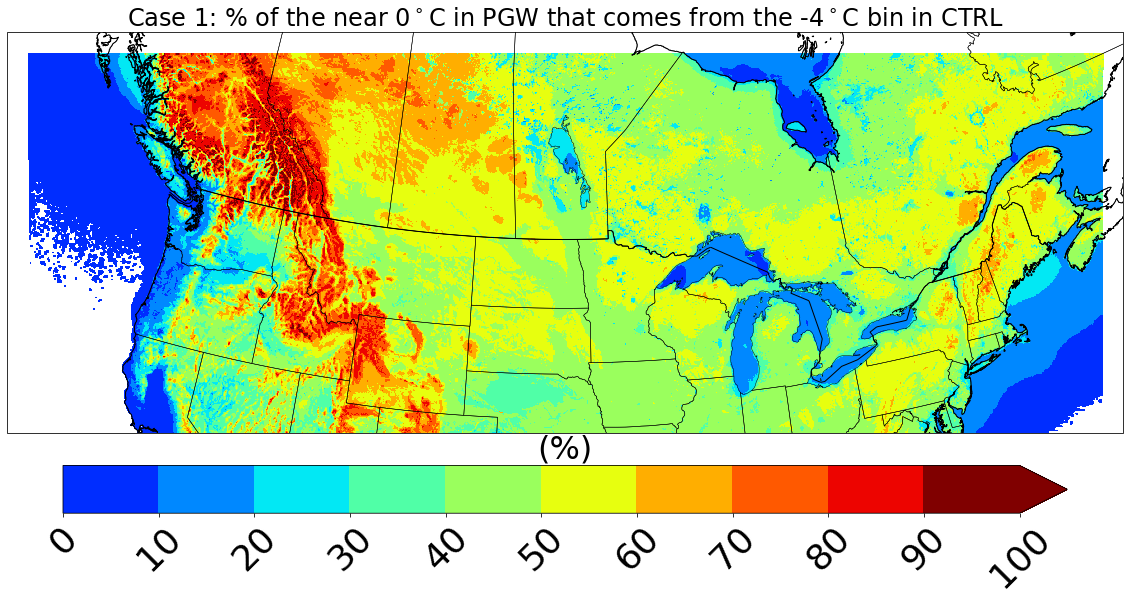

In [32]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"Case 1: % of the near 0${\rm ^\circ C}$ in PGW that comes from the -4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case1'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_case1_perc_ctrl.png', facecolor='white')
plt.show()

<ipython-input-31-668ae1d35545>:34: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case2'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
<ipython-input-31-668ae1d35545>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


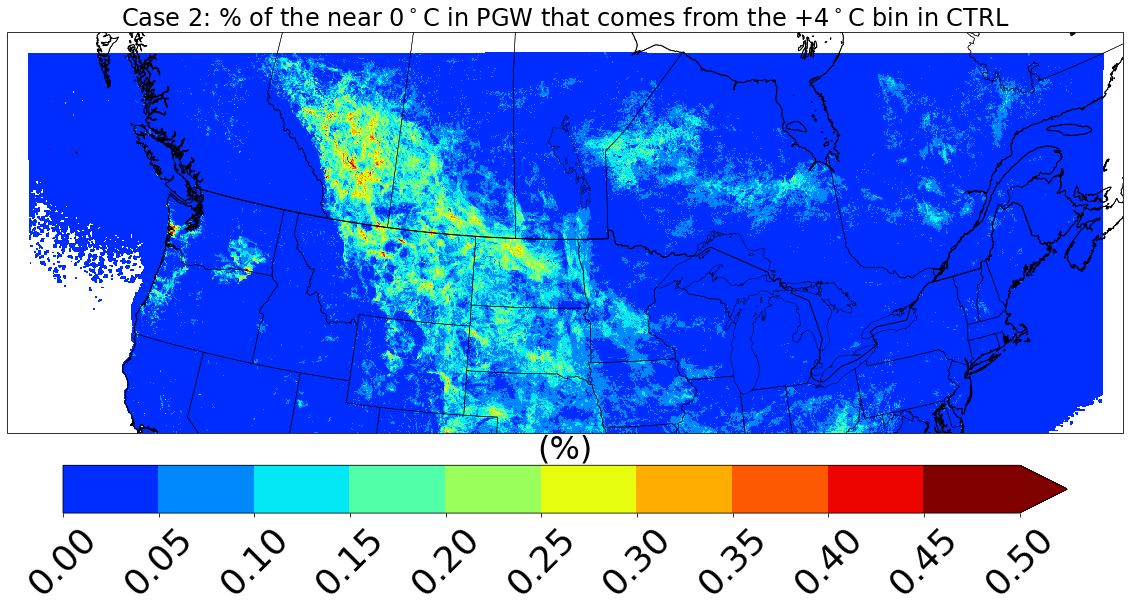

In [31]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 0.5 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 0.05
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"Case 2: % of the near 0${\rm ^\circ C}$ in PGW that comes from the +4${\rm ^\circ C}$ bin in CTRL"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case2'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_case2_perc.png', facecolor='white')
plt.show()

<ipython-input-30-94656b0e6e62>:34: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case3'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
<ipython-input-30-94656b0e6e62>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


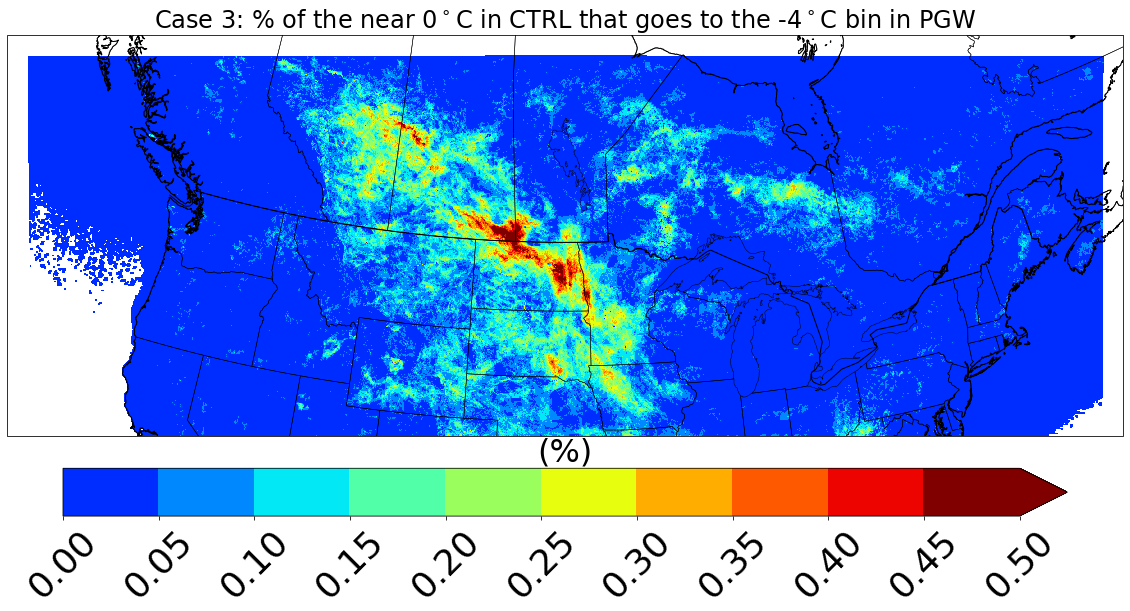

In [30]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 0.5 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 0.05
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"Case 3: % of the near 0${\rm ^\circ}$C in CTRL that goes to the -4${\rm ^\circ}$C bin in PGW"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case3'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_case3_perc.png', facecolor='white')
plt.show()

<ipython-input-29-f2ec1a5cc17b>:34: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case4'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
<ipython-input-29-f2ec1a5cc17b>:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


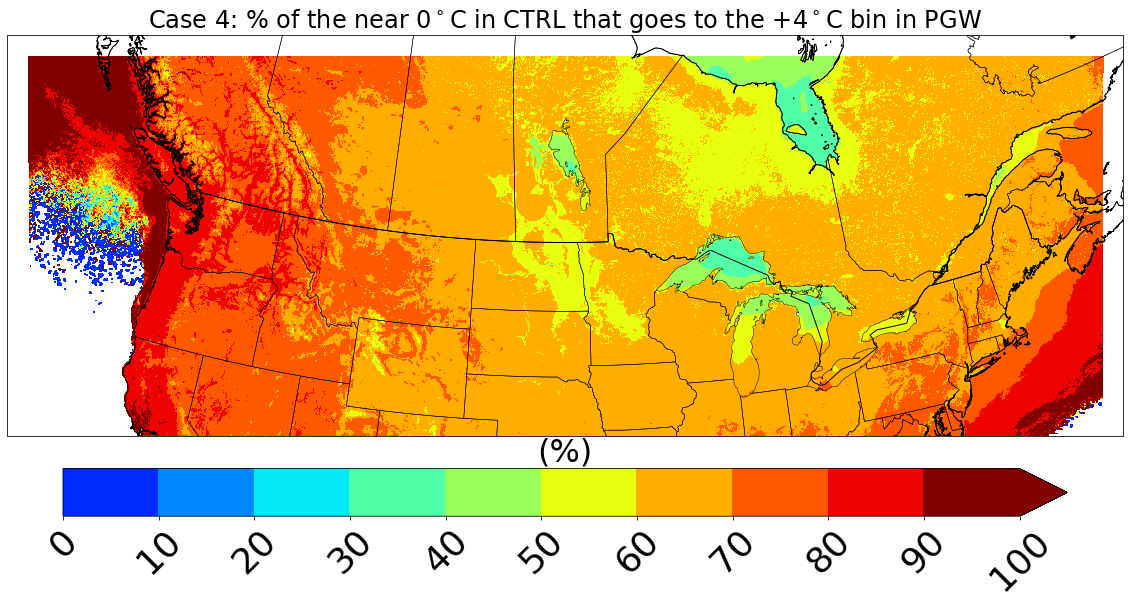

In [29]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 100 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 10
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"Case 4: % of the near 0${\rm ^\circ C}$ in CTRL that goes to the +4${\rm ^\circ C}$ bin in PGW"
#title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_case4'].values*100/aux1['total_near0_ctrl'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=32)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_case4_perc.png', facecolor='white')
plt.show()

<ipython-input-25-7a4ad6a50a06>:33: RuntimeWarning: invalid value encountered in true_divide
  cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0_both'].values*100/aux1['total_nopr'].values, transform=ccrs.PlateCarree(),
<ipython-input-25-7a4ad6a50a06>:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


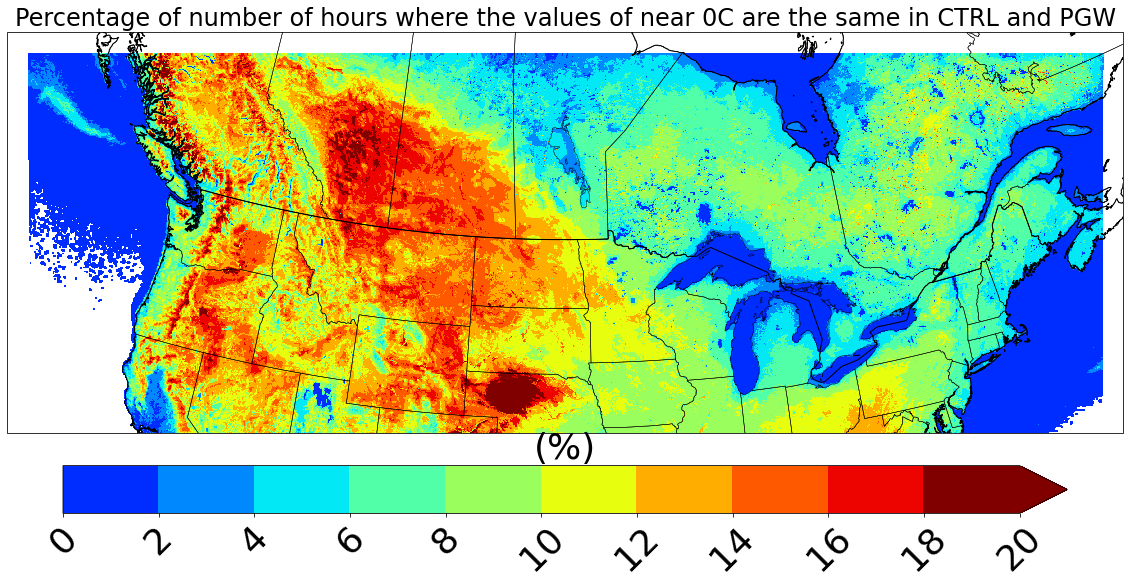

In [25]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 12), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 20 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 2
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"Percentage of number of hours where the values of near 0C are the same in CTRL and PGW"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0_both'].values*100/aux1['total_nopr'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_comparison_perc.png', facecolor='white')
plt.show()

<ipython-input-14-910a87f94552>:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


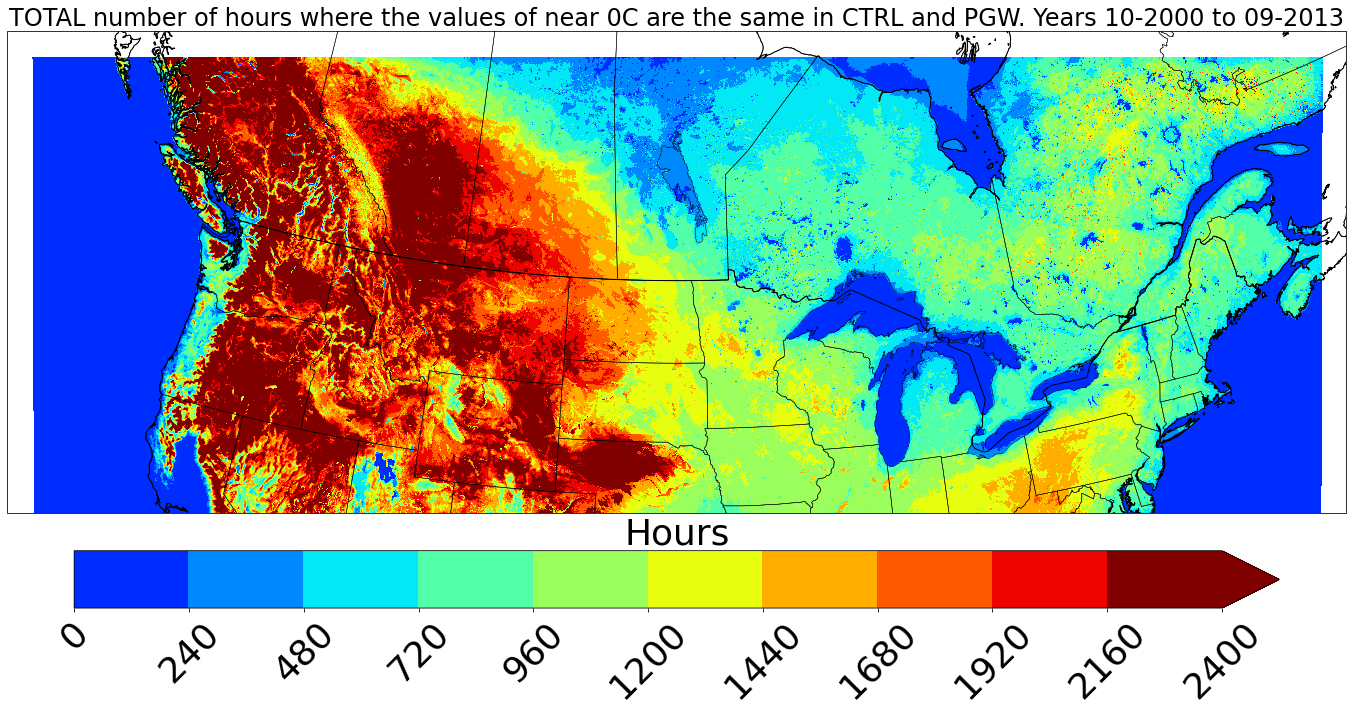

In [14]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(24, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2400 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 240
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"TOTAL number of hours where the values of near 0C are the same in CTRL and PGW. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0_both'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_comparison.png')
plt.show()

<ipython-input-15-2c584b725c00>:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


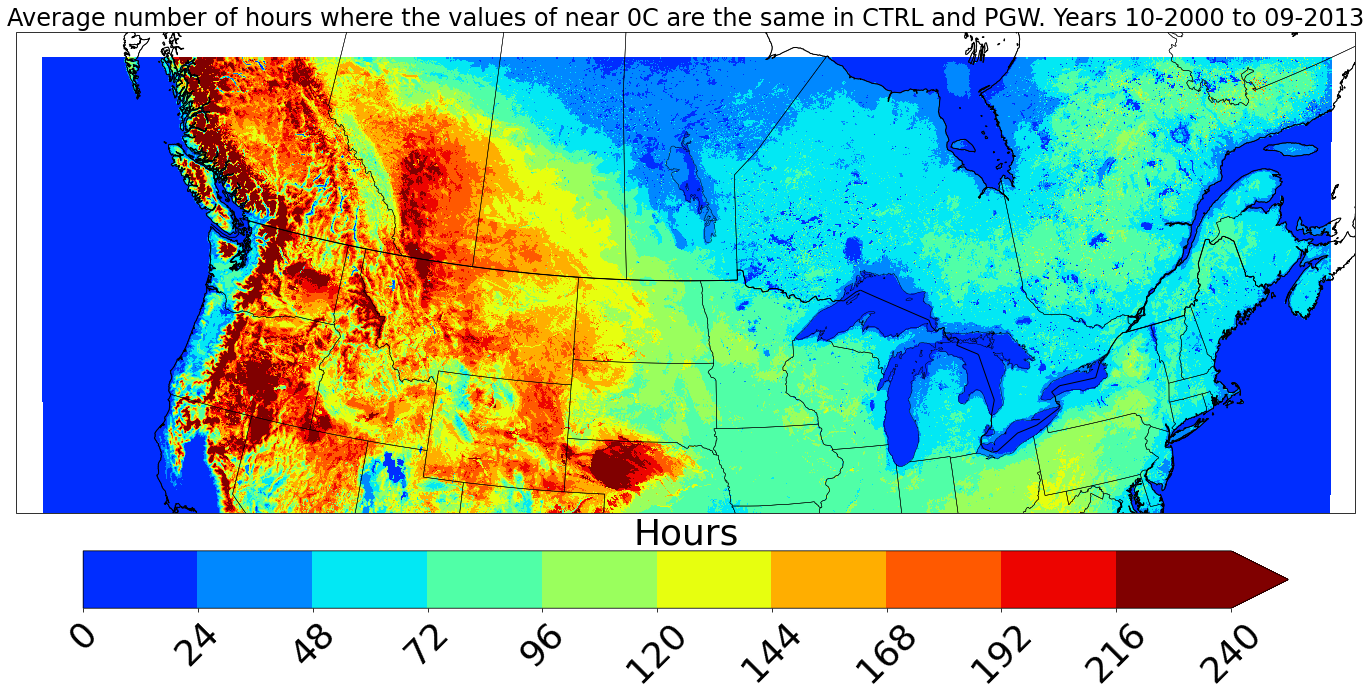

In [15]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(24, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 240 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 24
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"Average number of hours where the values of near 0C are the same in CTRL and PGW. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0_both'].values/13, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_comparison_avg.png')
plt.show()

<ipython-input-16-04248e06a25e>:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


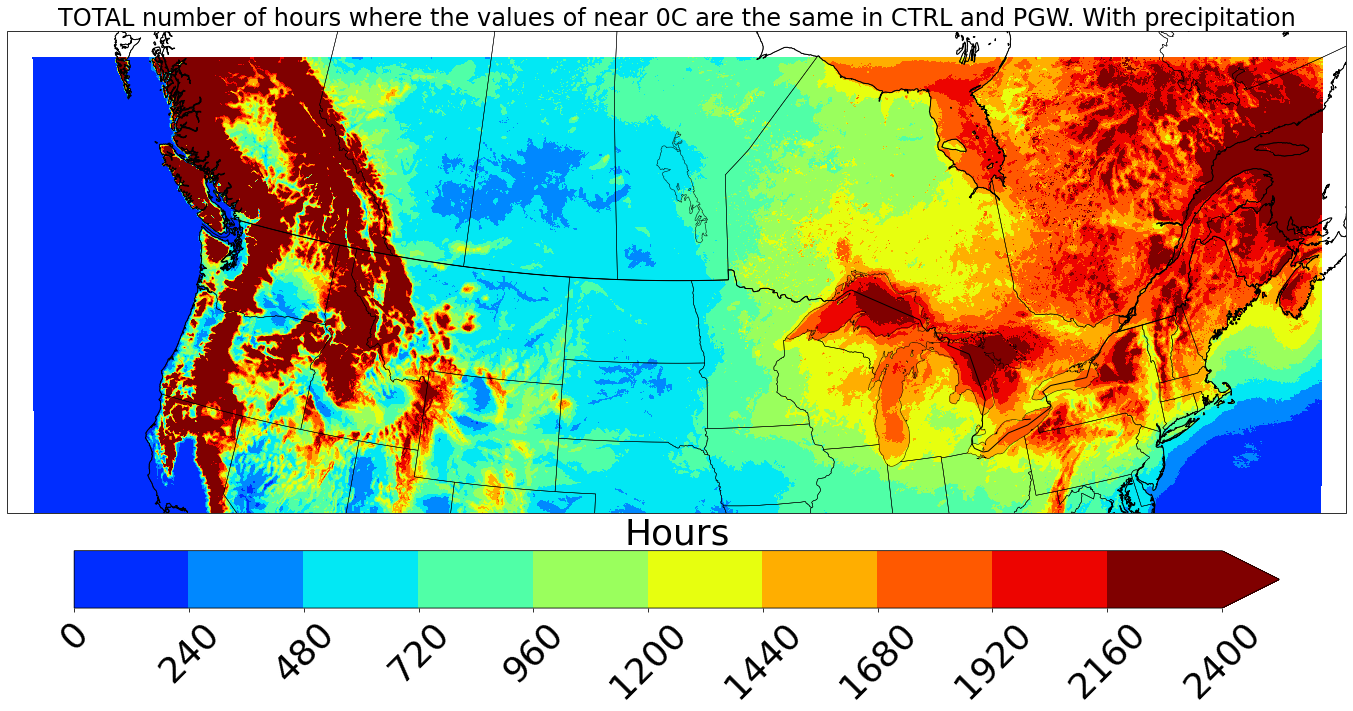

In [16]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(24, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2400 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 240
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"TOTAL number of hours where the values of near 0C are the same in CTRL and PGW. With precipitation"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_near0pr_both'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width, zorder=1)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=1)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2, zorder=1)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near0_comparison_precip.png')
plt.show()

In [ ]:
# Old stuff 

<ipython-input-86-b2698f3787c3>:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  f.subplots_adjust(wspace=0.05, hspace=0.01)
/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-86-b2698f3787c3>:157: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
<ipython-

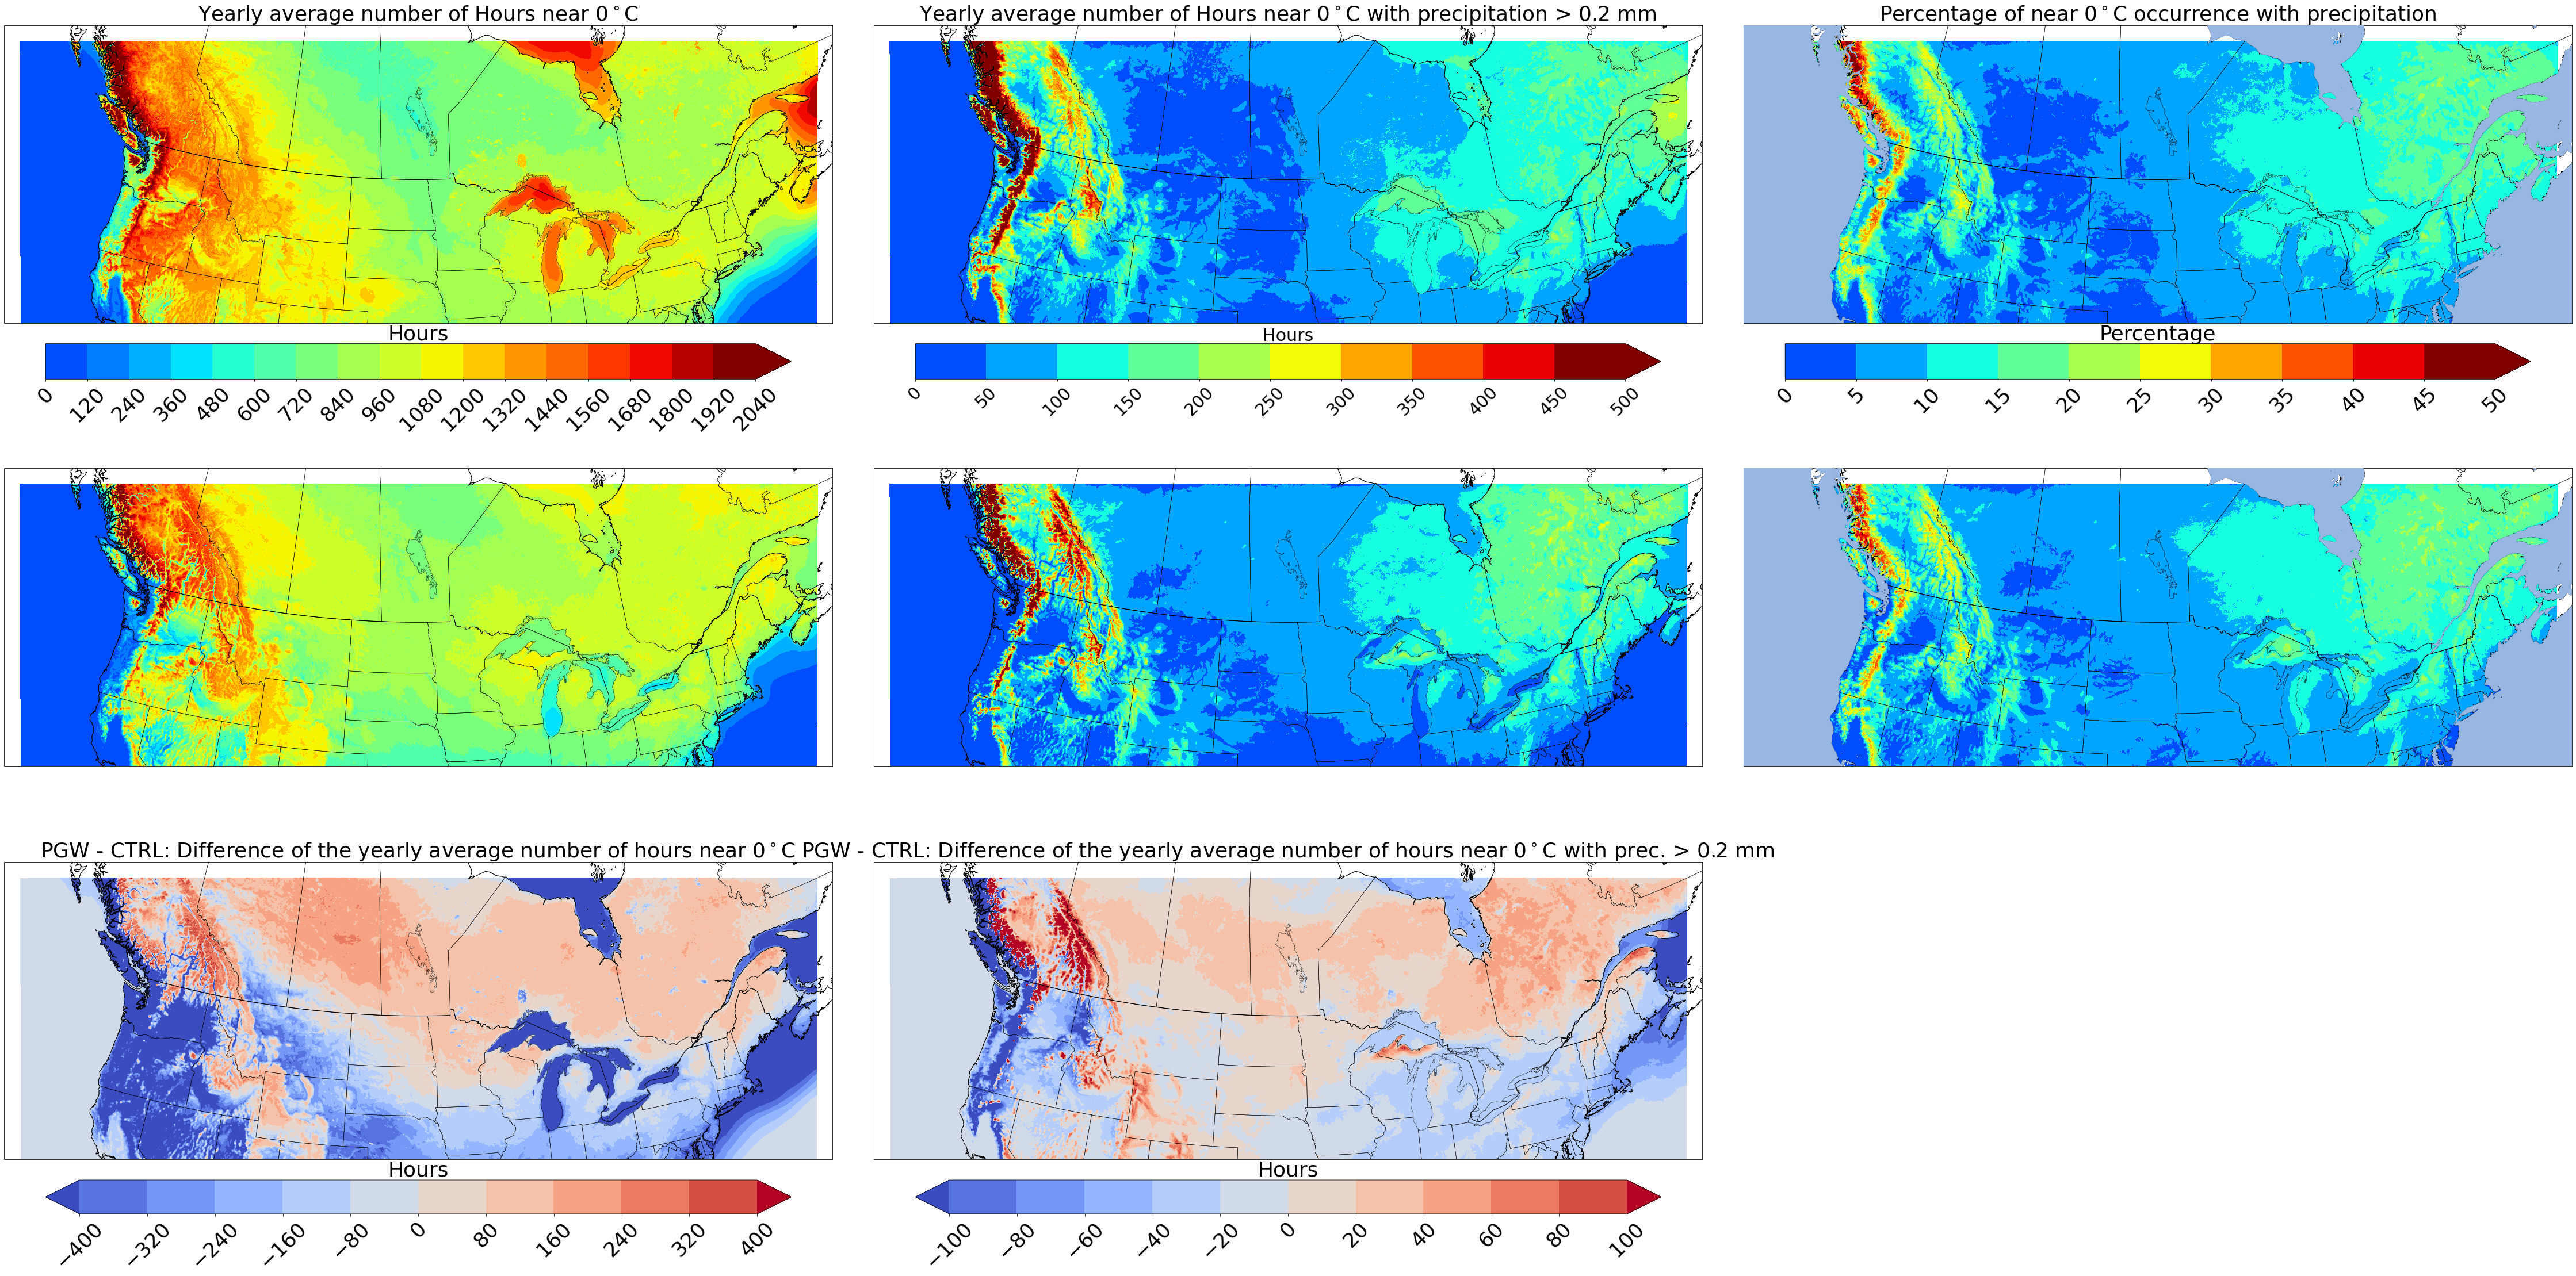

In [86]:
# Put all the figures in a single figure

from mpl_toolkits.axes_grid1 import make_axes_locatable
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

f, axs = plt.subplots(3, 3, figsize=(80, 40), subplot_kw={'projection': myLambert}, constrained_layout=True)

orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.2, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)



f.subplots_adjust(wspace=0.05, hspace=0.01)
for i, ax in enumerate(axs.flat):
    
    ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
        
    if i == 8:
        f.delaxes(ax)
        continue
    # Plot figure
    if i == 0:
        # CTRL: All Hours
        
        val_min = 0
        val_max = 2040
        val_int = 120
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        
        title = r"Yearly average number of Hours near 0${\rm ^\circ C}$"        
        ax.set_title(title, fontsize=36, wrap=True)
    elif i==1:
        # CTRL: Hours with precip
        
        val_min = 0
        val_max = 500
        val_int = 50
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pr'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
    
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
        cb.ax.set_title(unit, fontsize=30)
        cb.ax.tick_params(labelsize=30, labelrotation=45) 
        
        title = r"Yearly average number of Hours near 0${\rm ^\circ C}$ with precipitation > 0.2 mm"
        ax.set_title(title, fontsize=36)
        
    elif i==2:
        
        # CTRL: Percentage
        
        val_min = 0
        val_max = 50
        val_int = 5
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        unit = 'Percentage'
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_perc'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)        
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45)
        title = r"Percentage of near 0${\rm ^\circ C}$ occurrence with precipitation"
        ax.set_title(title, fontsize=36)
        
        ax.add_feature(cfeature.OCEAN, zorder=10)
        
    elif i==3:
        
        # PGW: All Hours
        val_min = 0
        val_max = 2040
        val_int = 120
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pgw'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)        
        
    elif i == 4:
        
        # PGW: hours with precipitation
        val_min = 0
        val_max = 500
        val_int = 50
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pr_pgw'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
    elif i == 5:
        
        # PGW: Percentage
        
        val_min = 0
        val_max = 50
        val_int = 5
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pgw_perc'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)                        
        
        ax.add_feature(cfeature.OCEAN, zorder=10)
        
    elif i == 6:
        
        # Difference, all hours
        val_max = 400
        val_min = -400
        val_int = 80
        new_cmap = plt.cm.coolwarm
        unit = "Hours"
        title = r"PGW - CTRL: Difference of the yearly average number of hours near 0${\rm ^\circ C}$ "        

        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        # Plot figure
        cs = (aux1['total_hour_pgw'] - aux1['total_hour']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
                   add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
        #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        # Plot colorbar
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        ax.set_title(title, fontsize=36)               
    elif i == 7:
        a = 0
        # Difference, hours with precipitation
        val_max = 100
        val_min = -100
        val_int = 20
        new_cmap = plt.cm.coolwarm
        unit = "Hours"
        title = r"PGW - CTRL: Difference of the yearly average number of hours near 0${\rm ^\circ C}$ with prec. > 0.2 mm"        

        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        # Plot figure
        cs = (aux1['total_hour_pr_pgw'] - aux1['total_hour_pr']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
                   add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
        #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        # Plot colorbar
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        
        ax.set_title(title, fontsize=36)
    # Plot title
    #

    ax.coastlines(resolution='10m', linewidth=width)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    #ax.add_feature(cfeature.OCEAN, zorder=10)

    #ax.set_title(f"Month: {i+1:02d}", fontsize=20)

    #plt.tight_layout()        

#plt.show()
plt.savefig('near0_fig3.png')